<a href="https://colab.research.google.com/github/situk0000/share_market-situ/blob/main/Share_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd


In [4]:
data = pd.read_csv("ADANIPORTS.csv")
print(data.head())

         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [5]:
X = data[["Open", "High", "Low", "Last", "Volume"]]
print(X.head())


     Open     High    Low   Last    Volume
0  770.00  1050.00  770.0  959.0  27294366
1  984.00   990.00  874.0  885.0   4581338
2  909.00   914.75  841.0  887.0   5124121
3  890.00   958.00  890.0  929.0   4609762
4  939.75   995.00  922.0  980.0   2977470


In [6]:
y = data["Close"]
print(y.head())

0    962.90
1    893.90
2    884.20
3    921.55
4    969.30
Name: Close, dtype: float64


Split the data


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

y_test.head(), X_train.head()


(2657    378.25
 2658    377.95
 2659    384.50
 2660    376.75
 2661    378.65
 Name: Close, dtype: float64,
      Open     High    Low   Last    Volume
 0  770.00  1050.00  770.0  959.0  27294366
 1  984.00   990.00  874.0  885.0   4581338
 2  909.00   914.75  841.0  887.0   5124121
 3  890.00   958.00  890.0  929.0   4609762
 4  939.75   995.00  922.0  980.0   2977470)

PreProcessing


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print( X_train_scaled[:5])

[[0.55063423 0.77421614 0.57057586 0.70916667 0.90800104]
 [0.72863381 0.72477442 0.65989608 0.6475     0.15206478]
 [0.66625078 0.66276626 0.63155409 0.64916667 0.17012971]
 [0.65044708 0.6984055  0.67363765 0.68416667 0.15301079]
 [0.69182782 0.72889457 0.7011208  0.72666667 0.09868476]]


Linear regression

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() #class model...object of the classs

lin_reg.fit(X_train_scaled , y_train)
preds_lr = []

current_input = X_test_scaled[-1].reshape(1,-1)


for i in range(3):

    next_pred = lin_reg.predict(current_input)[0]
    preds_lr.append(next_pred)
    new_input = current_input.copy()
    new_input[0,3] = next_pred
    current_input = new_input
print("Linear Regression - next 3 days prediction:" , preds_lr)

Linear Regression - next 3 days prediction: [np.float64(728.184887050524), np.float64(769554.0225701921), np.float64(813079435.1625377)]


SVR - Support Vector Regression

In [10]:
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X_train_scaled , y_train)
preds_svm = []
current_input = X_test_scaled[-1].reshape(1,-1)

for i in range(3):
    next_pred = svm_model.predict(current_input)[0]
    preds_svm.append(next_pred)
    current_input[0,3] = next_pred  # update close price
    current_input = current_input
print("SVM-- Next 3 days prediction:" , preds_svm)


SVM-- Next 3 days prediction: [np.float64(482.60515328323754), np.float64(402.52410246319624), np.float64(402.52410246319624)]


Random Forest Regressor


In [11]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train_scaled , y_train)
preds_rf = []
current_input = X_test_scaled[-1].reshape(1,-1)
for i in range(3):   # next 3 days prediction
    next_pred = rf_model.predict(current_input)[0]
    preds_rf.append(next_pred)
    current_input = np.roll(current_input, -1)
    current_input[0, -1] = next_pred  # replace last value with prediction

print(" RandomForestRegressor-Next 3 days predictions:", preds_rf)

 RandomForestRegressor-Next 3 days predictions: [np.float64(1041.4610000000005), np.float64(609.2424999999992), np.float64(1181.9640000000006)]


 LSTM-- Long Short-Term Memory

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - loss: 0.0070
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0016
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.0012
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0016
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - loss: 0.0012
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 0.0010
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 8.3303e-04
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.0014
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 8.4068e-04
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.0011
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 6.6420e-04
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 7.9296e-04
Epoch 13/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 8.1608e-04
Epoch 14/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0012
Epoch 15/50
102

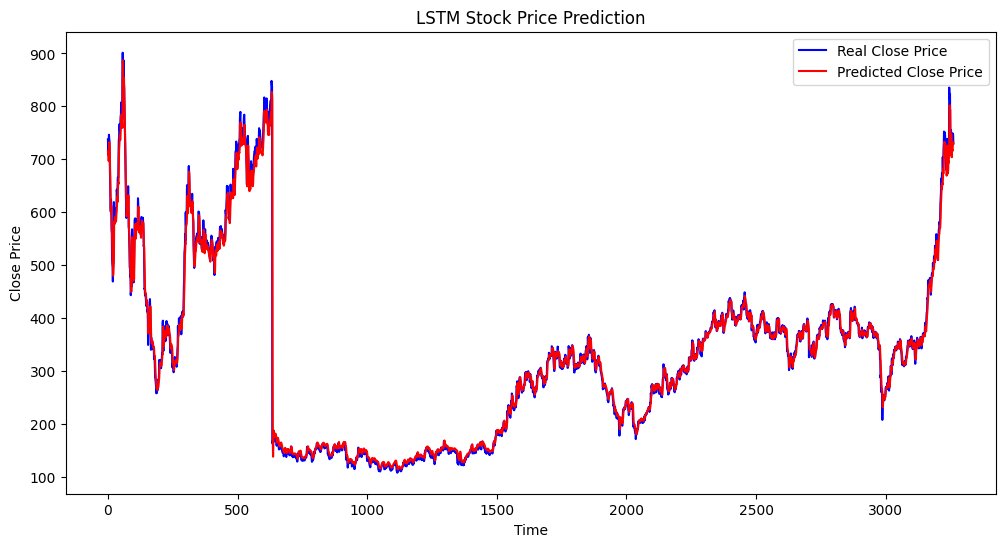

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# STEP 1 : upload dataset

#data = pd.read_csv("ADANIPORTS.csv")

dataset = data[['Close']].values

# ----------------------------
# STEP 2: Normalize the data
# ----------------------------
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# ----------------------------
# STEP 3: Create sequences
# ----------------------------
def create_dataset(series, time_step=60):
    X, y = [], []
    for i in range(time_step, len(series)):
        X.append(series[i-time_step:i, 0])  # past 60 values
        y.append(series[i, 0])              # next value
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape X for LSTM [samples, time_steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# ----------------------------
# STEP 4: Build LSTM model
# ----------------------------
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # prediction for next closing price

model.compile(optimizer='adam', loss='mean_squared_error')

# ----------------------------
# STEP 5: Train the model
# ----------------------------
model.fit(X, y, epochs=50, batch_size=32)

# ----------------------------
# STEP 6: Predictions
# ----------------------------
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)  # convert back to original scale
real = scaler.inverse_transform(y.reshape(-1,1))

# Create a DataFrame for easy viewing
results = pd.DataFrame({'Real Price': real.flatten(), 'Predicted Price': predicted.flatten()})
print("--- Real vs. Predicted Prices ---")
print(results)

# ----------------------------
# STEP 7: Plot results
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(real, color='blue', label="Real Close Price")
plt.plot(predicted, color='red', label="Predicted Close Price")
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
model.save("lstm_close_model.h5")
import joblib
joblib.dump(scaler, "lstm_scaler.pkl")
print("✅ LSTM model and scaler saved!")


✅ LSTM model and scaler saved!
